In [35]:





import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import plotly.express as px
import pandas as pd 
import numpy as np
from ctgan import CTGANSynthesizer

In [2]:
df = pd.read_csv('../datasets/loan_data_clean.csv')

In [31]:
sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

In [3]:
df.head()

,Unnamed: 0,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,1


In [4]:
df_1 = df.drop(columns=['Unnamed: 0'])

In [5]:
df_1.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,1
1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,1
3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,1


In [6]:
df_1['bool_col'] = np.where(df_1['Loan_Status'] ==1, 'True', 'False')

In [7]:
df_1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,bool_col
0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,1,True
1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,0,False
2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,1,True
3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,1,True
4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,1,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,125,0.0,71.000000,360.0,1.0,0,1,True
610,1,1,3.0,0,0,275,0.0,40.000000,180.0,1.0,0,1,True
611,1,1,1.0,0,0,431,240.0,253.000000,360.0,1.0,2,1,True
612,1,1,2.0,0,0,422,0.0,187.000000,360.0,1.0,2,1,True


In [8]:
df_2 = df_1.drop(columns=['Loan_Status'])

In [9]:
df_2

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,bool_col
0,1,0,0.0,0,0,376,0.0,146.412162,360.0,1.0,2,True
1,1,1,1.0,0,0,306,1508.0,128.000000,360.0,1.0,0,False
2,1,1,0.0,0,1,139,0.0,66.000000,360.0,1.0,2,True
3,1,1,0.0,1,0,90,2358.0,120.000000,360.0,1.0,2,True
4,1,0,0.0,0,0,381,0.0,141.000000,360.0,1.0,2,True
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0.0,0,0,125,0.0,71.000000,360.0,1.0,0,True
610,1,1,3.0,0,0,275,0.0,40.000000,180.0,1.0,0,True
611,1,1,1.0,0,0,431,240.0,253.000000,360.0,1.0,2,True
612,1,1,2.0,0,0,422,0.0,187.000000,360.0,1.0,2,True


In [10]:
discrete_col = ['bool_col']

In [11]:
ctgan = CTGANSynthesizer(epochs=4000)

In [12]:
ctgan.fit(df_2, discrete_col)

C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (3) found smaller than n_clusters (10). Possibly due to duplicate points in X.
  label = cluster.KMeans(n_clusters=self.n_components, n_init=1,
C:\Users\Wessware\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\sklearn\mixture\_base.py:147: ConvergenceWarning: Number of distinct clusters (4) found smaller than n_clusters (10). Possibly due to du

In [16]:
samples = ctgan.sample(4000)

In [17]:
samples

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,bool_col
0,1,1,1.015491,0,0,60,2263.426739,120.264574,362.034926,0.999618,2,True
1,1,1,2.793550,1,2,299,207.078743,97.333547,185.855127,0.994450,1,True
2,0,0,1.020575,0,1,497,-222.105153,98.957504,361.411489,0.999132,0,True
3,1,1,0.967628,0,0,35,1874.200797,141.121981,360.427013,0.999273,2,True
4,1,1,1.929354,0,0,340,47.080906,322.936778,360.013915,0.979882,0,True
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,2.118012,0,0,248,2693.049737,176.172212,360.665439,1.007047,1,True
3996,0,0,-0.002574,0,0,249,1949.728061,117.277610,361.044262,0.986177,1,True
3997,1,1,0.010152,0,0,300,2882.202092,136.098872,361.722296,0.994603,0,True
3998,0,1,-0.002625,0,0,385,182.631094,191.733185,360.723093,0.989029,1,False


In [19]:
samples.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'bool_col'],
      dtype='object')

In [22]:
#sns.displot(a=samples.ApplicantIncome, color='r', hist_kw={'edgecolor': 'white'})

#sns.displot(a=df_2.ApplicantIncome, color='g', hist_kw={'edgecolor': 'white'})

#plt.show()

In [23]:
samples['Loan_Status'] = np.where(samples['bool_col'] == 'True', 1, 0)

In [24]:
samples

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,bool_col,Loan_Status
0,1,1,1.015491,0,0,60,2263.426739,120.264574,362.034926,0.999618,2,True,1
1,1,1,2.793550,1,2,299,207.078743,97.333547,185.855127,0.994450,1,True,1
2,0,0,1.020575,0,1,497,-222.105153,98.957504,361.411489,0.999132,0,True,1
3,1,1,0.967628,0,0,35,1874.200797,141.121981,360.427013,0.999273,2,True,1
4,1,1,1.929354,0,0,340,47.080906,322.936778,360.013915,0.979882,0,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,2.118012,0,0,248,2693.049737,176.172212,360.665439,1.007047,1,True,1
3996,0,0,-0.002574,0,0,249,1949.728061,117.277610,361.044262,0.986177,1,True,1
3997,1,1,0.010152,0,0,300,2882.202092,136.098872,361.722296,0.994603,0,True,1
3998,0,1,-0.002625,0,0,385,182.631094,191.733185,360.723093,0.989029,1,False,0


In [25]:
df_3 = samples.drop(columns=['bool_col'])

In [26]:
df_3

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,1,1.015491,0,0,60,2263.426739,120.264574,362.034926,0.999618,2,1
1,1,1,2.793550,1,2,299,207.078743,97.333547,185.855127,0.994450,1,1
2,0,0,1.020575,0,1,497,-222.105153,98.957504,361.411489,0.999132,0,1
3,1,1,0.967628,0,0,35,1874.200797,141.121981,360.427013,0.999273,2,1
4,1,1,1.929354,0,0,340,47.080906,322.936778,360.013915,0.979882,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3995,1,1,2.118012,0,0,248,2693.049737,176.172212,360.665439,1.007047,1,1
3996,0,0,-0.002574,0,0,249,1949.728061,117.277610,361.044262,0.986177,1,1
3997,1,1,0.010152,0,0,300,2882.202092,136.098872,361.722296,0.994603,0,1
3998,0,1,-0.002625,0,0,385,182.631094,191.733185,360.723093,0.989029,1,0


In [42]:
df_3.to_csv('synthesized_loan_data.csv', index=None, header=True)

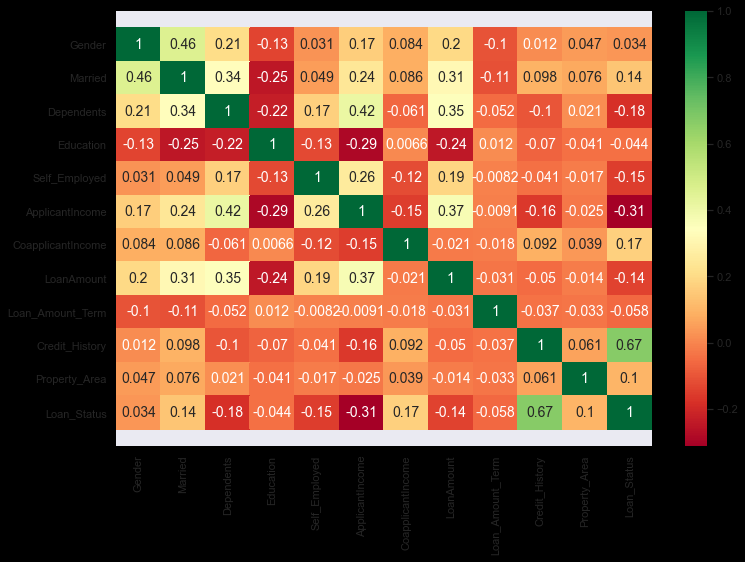

In [33]:
corrmat = df_3.corr()
top_corr_features = corrmat.index

f, ax = plt.subplots(figsize=(12, 8))

g = sns.heatmap(df_3[top_corr_features].corr(), annot=True, cmap='RdYlGn')
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

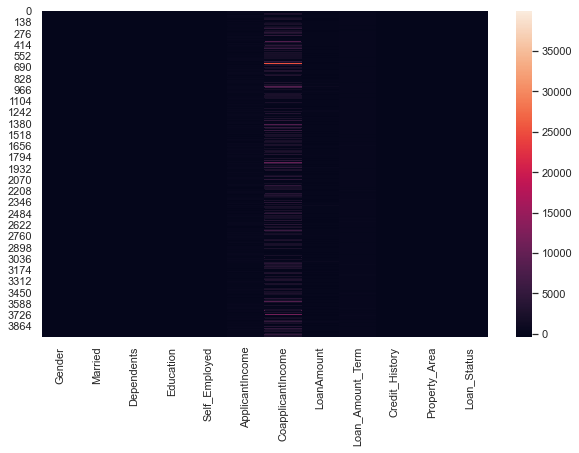

In [34]:
sns.set()
ax = sns.heatmap(df_3)

In [38]:
fig = px.histogram(df_3, x = 'ApplicantIncome', marginal='box', color_discrete_sequence=['red'], title='Applicant Income sample')
fig.update_layout(bargap=0.1)
fig.show()

In [39]:
fig = px.distplot(df_3, x ='ApplicantIncome', marginal='box', color_discrete_sequence=['blue'], title='Applicant Income Original')
fig.update_layout(bargap=0.1)
fig.show()
